Epoch 0, Loss: 383.0805969238281
Epoch 500, Loss: 12.865262031555176
Epoch 1000, Loss: 12.84298324584961
Epoch 1500, Loss: 12.831268310546875
Epoch 2000, Loss: 12.82116413116455
Epoch 2500, Loss: 12.792009353637695
Epoch 3000, Loss: 6.417801380157471
Epoch 3500, Loss: 1.2914021015167236
Epoch 4000, Loss: 0.3810640275478363
Epoch 4500, Loss: 0.17203421890735626
Epoch 5000, Loss: 0.08361706137657166
Epoch 5500, Loss: 0.03973262012004852
Epoch 6000, Loss: 0.018028074875473976
Epoch 6500, Loss: 0.007956583984196186
Epoch 7000, Loss: 0.004195146728307009
Epoch 7500, Loss: 0.0026768443640321493
Epoch 8000, Loss: 0.001860581454820931
Epoch 8500, Loss: 0.001361940405331552
Epoch 9000, Loss: 0.001005139434710145
Epoch 9500, Loss: 0.0007531334995292127
Epoch 10000, Loss: 0.0005856952629983425
Epoch 10500, Loss: 0.004979474004358053
Epoch 11000, Loss: 0.0004943421809002757
Epoch 11500, Loss: 0.0003545285144355148
Epoch 12000, Loss: 0.00024503478198312223
Epoch 12500, Loss: 0.0001440255146007985
E

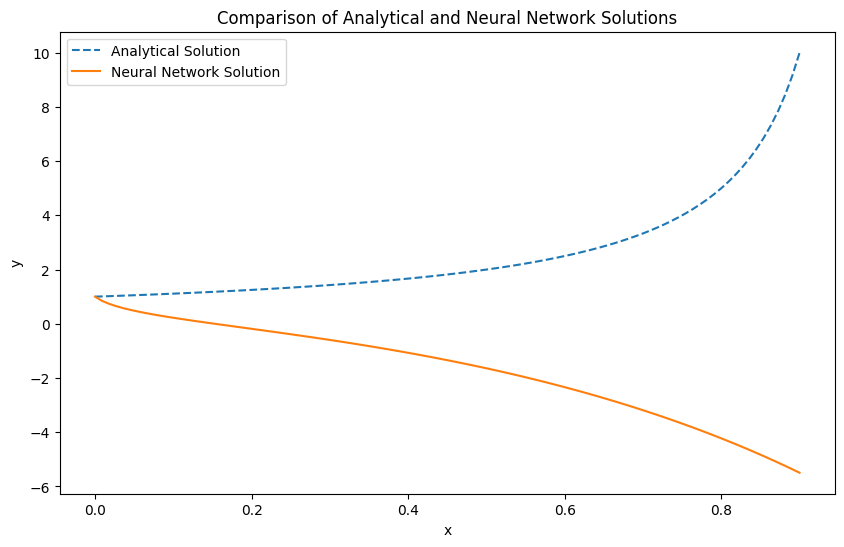

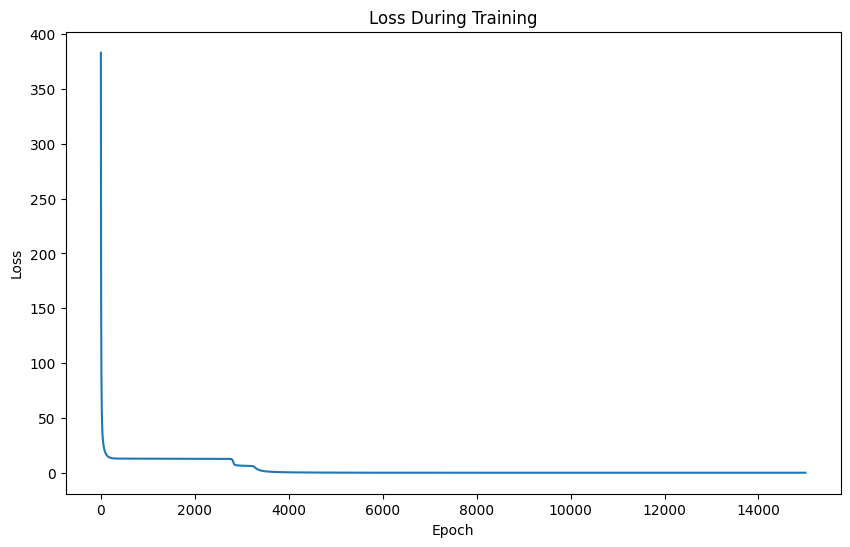

In [8]:
from math import exp
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Definición de la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.hidden(x)

# Solución analítica para comparación (válida para condiciones iniciales específicas)
def analytical_solution(x):
    return 1 / (1 - x)  # Suponiendo y(0) = 1

# Definición del dominio
x_values = torch.linspace(0, 0.9, 100).view(-1, 1)  # Dominio restringido para evitar singularidad en x = 1

# Modelo y optimizador
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Lista para almacenar las pérdidas
losses = []

# Entrenamiento de la red
n_epochs = 15000
for epoch in range(n_epochs):
    optimizer.zero_grad()

    # Habilitar gradientes para x_values
    x_values.requires_grad_(True)

    # Predicción de la red
    y_pred = model(x_values)

    # Condición inicial y solución aproximada
    y_0 = torch.tensor([[1.0]])  # Condición inicial y(0) = 1
    y_trial = y_0 + x_values * y_pred

    # Derivada de la solución aproximada
    dy_dx = torch.autograd.grad(y_trial, x_values, grad_outputs=torch.ones_like(x_values), create_graph=True)[0]

    # Pérdida basada en la ecuación diferencial
    loss = criterion(dy_dx - 2*(y_trial - 1) + torch.exp(3*y_trial) + 1, torch.zeros_like(x_values))

    # Retropropagación
    loss.backward()
    optimizer.step()

    # Deshabilitar gradientes para x_values
    x_values.requires_grad_(False)

    # Almacenar pérdida
    losses.append(loss.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Predicciones finales
with torch.no_grad():
    x_values.requires_grad_(True)
    y_pred = model(x_values)
    y_nn_solution = torch.tensor([[1.0]]) + x_values * y_pred  # Reconstrucción de la solución

# Solución analítica
x_np = x_values.detach().numpy()
y_analytical = analytical_solution(x_np)

# Gráfica de las soluciones
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_analytical, label="Analytical Solution", linestyle="--")
plt.plot(x_np, y_nn_solution.detach().numpy(), label="Neural Network Solution")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Analytical and Neural Network Solutions")
plt.show()

# Gráfica de la pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss During Training")
plt.show()


Epoch 0, Loss: 433.29449462890625
Epoch 500, Loss: 12.902763366699219
Epoch 1000, Loss: 12.847867012023926
Epoch 1500, Loss: 12.82333755493164
Epoch 2000, Loss: 12.338042259216309
Epoch 2500, Loss: 6.386151313781738
Epoch 3000, Loss: 5.990370273590088
Epoch 3500, Loss: 0.7153832912445068
Epoch 4000, Loss: 0.3025507926940918
Epoch 4500, Loss: 0.16731546819210052
Epoch 5000, Loss: 0.0986209511756897
Epoch 5500, Loss: 0.052825890481472015
Epoch 6000, Loss: 0.020321743562817574
Epoch 6500, Loss: 0.00395083287730813
Epoch 7000, Loss: 0.0008507610764354467
Epoch 7500, Loss: 0.0003776181838475168
Epoch 8000, Loss: 0.00024110307276714593
Epoch 8500, Loss: 0.00017589348135516047
Epoch 9000, Loss: 0.0001328869111603126
Epoch 9500, Loss: 0.0001043922093231231
Epoch 10000, Loss: 8.186342165572569e-05
Epoch 10500, Loss: 6.734024645993486e-05
Epoch 11000, Loss: 5.851426612935029e-05
Epoch 11500, Loss: 8.9304092398379e-05
Epoch 12000, Loss: 4.515043110586703e-05
Epoch 12500, Loss: 4.193554195808247e-

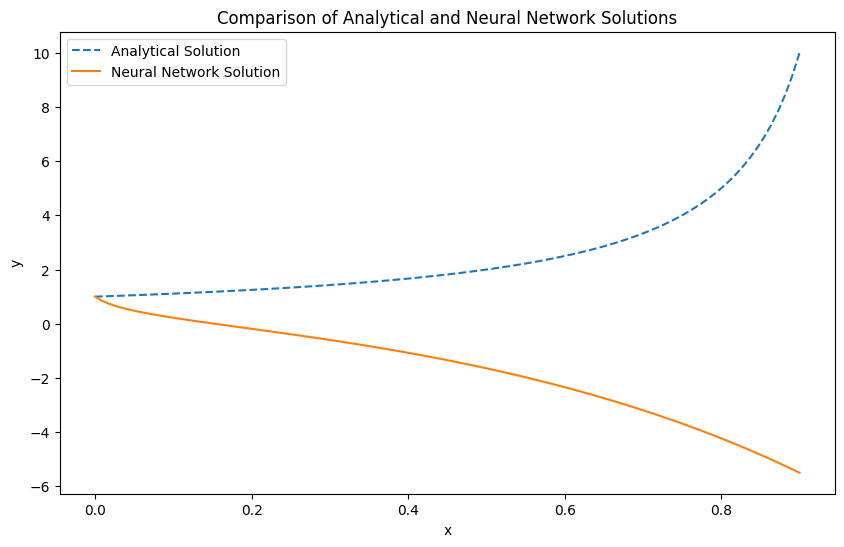

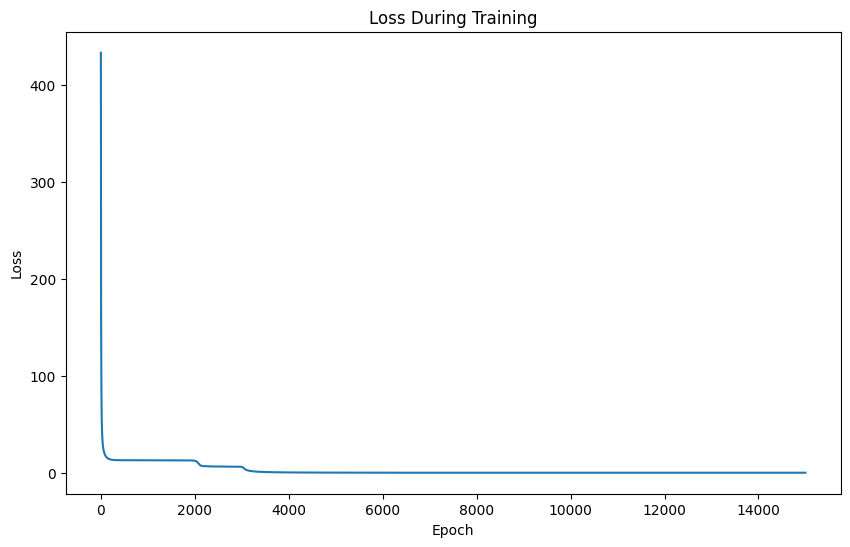

Pesos y sesgos de la red neuronal:
Peso de la capa hidden.0.weight: 
tensor([[ 0.2310],
        [-0.0931],
        [ 3.3309],
        [ 0.1262],
        [ 8.6838],
        [-0.0514],
        [ 0.0590],
        [-0.1940],
        [ 0.1248],
        [ 1.1910]])
Sesgo de la capa hidden.0.bias: 
tensor([ 1.3080, -1.0482, -0.4256,  1.3275, -0.0062, -1.1678,  1.2134, -0.5207,
         1.0920, -1.4584])
Peso de la capa hidden.2.weight: 
tensor([[ 0.1570, -0.1947,  0.5920,  0.3549,  9.9109, -0.1852, -0.1287, -0.3819,
          0.1029,  0.8720],
        [-0.7993,  0.4118, -0.0181, -0.0625,  2.4224,  0.1986, -0.5742,  0.0804,
         -0.5153, -1.7204],
        [ 0.6480, -0.5556, -0.4707,  0.2264, -0.4728, -0.4828,  0.5424, -0.1227,
          0.5267,  0.0715],
        [ 0.6463, -0.1586, -0.0612,  0.4788, -0.6823, -0.5813,  0.4280, -0.3536,
          0.5228,  0.0234],
        [-0.2778,  0.3320, -0.0222, -0.2930,  4.5442,  0.2250, -0.4627, -0.0216,
         -0.4092, -1.2323],
        [-1.1581,  0.

In [9]:
from math import exp
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Definición de la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.hidden(x)

# Solución analítica para comparación (válida para condiciones iniciales específicas)
def analytical_solution(x):
    return 1 / (1 - x)  # Suponiendo y(0) = 1

# Definición del dominio
x_values = torch.linspace(0, 0.9, 100).view(-1, 1)  # Dominio restringido para evitar singularidad en x = 1

# Modelo y optimizador
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Lista para almacenar las pérdidas
losses = []

# Entrenamiento de la red
n_epochs = 15000
for epoch in range(n_epochs):
    optimizer.zero_grad()

    # Habilitar gradientes para x_values
    x_values.requires_grad_(True)

    # Predicción de la red
    y_pred = model(x_values)

    # Condición inicial y solución aproximada
    y_0 = torch.tensor([[1.0]])  # Condición inicial y(0) = 1
    y_trial = y_0 + x_values * y_pred

    # Derivada de la solución aproximada
    dy_dx = torch.autograd.grad(y_trial, x_values, grad_outputs=torch.ones_like(x_values), create_graph=True)[0]

    # Pérdida basada en la ecuación diferencial
    loss = criterion(dy_dx - 2*(y_trial - 1) + torch.exp(3*y_trial) + 1, torch.zeros_like(x_values))

    # Retropropagación
    loss.backward()
    optimizer.step()

    # Deshabilitar gradientes para x_values
    x_values.requires_grad_(False)

    # Almacenar pérdida
    losses.append(loss.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Predicciones finales
with torch.no_grad():
    x_values.requires_grad_(True)
    y_pred = model(x_values)
    y_nn_solution = torch.tensor([[1.0]]) + x_values * y_pred  # Reconstrucción de la solución

# Solución analítica
x_np = x_values.detach().numpy()
y_analytical = analytical_solution(x_np)

# Gráfica de las soluciones
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_analytical, label="Analytical Solution", linestyle="--")
plt.plot(x_np, y_nn_solution.detach().numpy(), label="Neural Network Solution")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Analytical and Neural Network Solutions")
plt.show()

# Gráfica de la pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss During Training")
plt.show()

# Imprimir los pesos de las capas
print("Pesos y sesgos de la red neuronal:")
for name, param in model.named_parameters():
    if 'weight' in name:
        print(f"Peso de la capa {name}: \n{param.data}")
    elif 'bias' in name:
        print(f"Sesgo de la capa {name}: \n{param.data}")


In [10]:
pip install torchviz


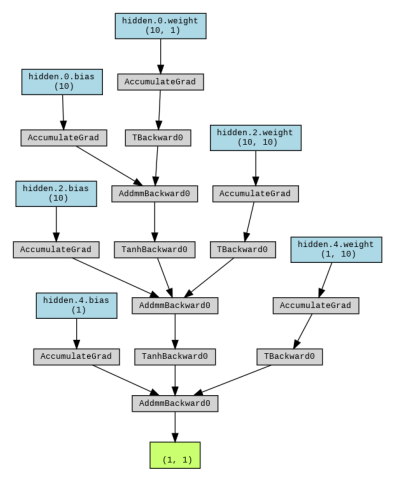

In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

# Definición de la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.hidden(x)

# Modelo entrenado (usamos los pesos ya entrenados)
model = NeuralNetwork()

# Realizar una pasada de ejemplo para generar un gráfico
x_example = torch.tensor([[0.5]])  # Entrada de ejemplo
y_example = model(x_example)  # Propagación hacia adelante

# Visualización de la arquitectura de la red y los pesos finales
# Generar el grafo de la red neuronal
dot = torchviz.make_dot(y_example, params=dict(model.named_parameters()))

# Guardar el gráfico como un archivo PNG
dot.render("neural_network_architecture", format="png")

# Mostrar el gráfico en pantalla
img = plt.imread("neural_network_architecture.png")
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")  # Ocultar los ejes
plt.show()


Epoch 0, Loss: 0.6920740604400635
Epoch 1000, Loss: 0.04225357621908188
Epoch 2000, Loss: 0.03332788869738579
Epoch 3000, Loss: 0.026856616139411926
Epoch 4000, Loss: 0.02369312196969986
Epoch 5000, Loss: 0.022255580872297287
Epoch 6000, Loss: 0.019233543425798416
Epoch 7000, Loss: 0.0169238094240427
Epoch 8000, Loss: 0.01768050342798233
Epoch 9000, Loss: 0.014979912899434566


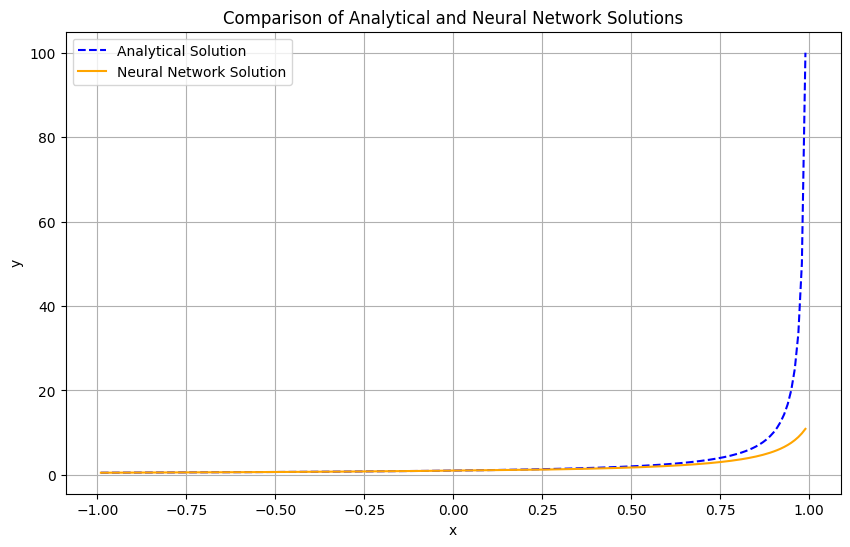

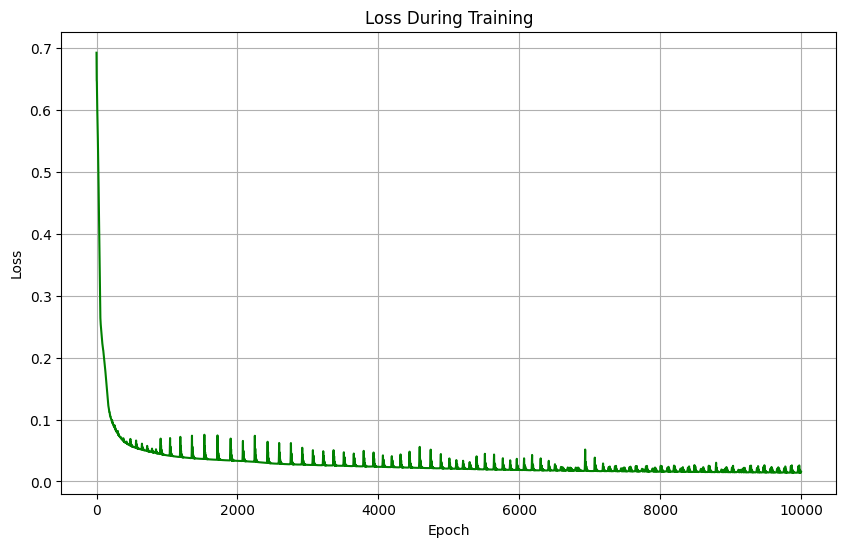

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Definir la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(1, 20),  # Incrementamos las neuronas para mayor capacidad
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.hidden(x)

# Paso 2: Solución analítica de la ecuación diferencial
def analytical_solution(x):
    return 1 / (1 - x)  # Solución válida para y(0) = 1 y x < 1

# Paso 3: Definir el dominio de la solución
domain_start = -0.99  # Ampliamos el dominio hacia valores negativos
x_values = torch.linspace(domain_start, 0.99, 200).view(-1, 1)  # Dominio más amplio

# Paso 4: Inicializar el modelo, optimizador y pérdida
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  # Ajustamos la tasa de aprendizaje
criterion = nn.MSELoss()

# Paso 5: Entrenamiento de la red neuronal
losses = []
n_epochs = 10000  # Más épocas para mayor precisión

for epoch in range(n_epochs):
    optimizer.zero_grad()

    # Habilitar gradientes en x_values
    x_values.requires_grad_(True)

    # Predicción de la red
    y_pred = model(x_values)

    # Condición inicial y solución tentativa
    y_0 = torch.tensor([[1.0]])  # y(0) = 1
    y_trial = y_0 + x_values * y_pred

    # Derivada de la solución tentativa
    dy_dx = torch.autograd.grad(y_trial, x_values, grad_outputs=torch.ones_like(x_values), create_graph=True)[0]

    # Pérdida basada en la ecuación diferencial
    loss = criterion(dy_dx - y_trial**2, torch.zeros_like(x_values))

    # Retropropagación y optimización
    loss.backward()
    optimizer.step()

    # Deshabilitar gradientes en x_values
    x_values.requires_grad_(False)

    # Guardar pérdida para graficar
    losses.append(loss.item())

    # Imprimir progreso cada 1000 épocas
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Paso 6: Obtener la solución de la red neuronal
with torch.no_grad():
    x_values.requires_grad_(True)
    y_nn = model(x_values)
    y_nn_solution = torch.tensor([[1.0]]) + x_values * y_nn

# Paso 7: Solución analítica
x_np = x_values.detach().numpy()
y_analytical = analytical_solution(x_np)

# Paso 8: Graficar las soluciones
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_analytical, label="Analytical Solution", linestyle="--", color="blue")
plt.plot(x_np, y_nn_solution.detach().numpy(), label="Neural Network Solution", color="orange")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Analytical and Neural Network Solutions")
plt.grid(True)
plt.show()

# Paso 9: Graficar la evolución de la pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), losses, color="green")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss During Training")
plt.grid(True)
plt.show()

# Comentarios sobre el código:
# - Ampliamos el dominio para resolver la ecuación diferencial en un intervalo más amplio.
# - Ajustamos la arquitectura de la red para manejar mejor un dominio extendido.
# - Entrenamos por más épocas y monitoreamos la convergencia de la pérdida.
# - Comparamos soluciones para evaluar la precisión en el intervalo extendido.


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Epoch 0, Loss: 110.55136108398438
Epoch 500, Loss: 0.013979578390717506
Epoch 1000, Loss: 0.02792445942759514
Epoch 1500, Loss: 0.0026935962960124016
Epoch 2000, Loss: 0.0027847355231642723
Epoch 2500, Loss: 0.0012193588772788644
Epoch 3000, Loss: 0.001165971509180963
Epoch 3500, Loss: 0.0007233332144096494
Epoch 4000, Loss: 0.0005901937838643789
Epoch 4500, Loss: 0.0004938785568810999


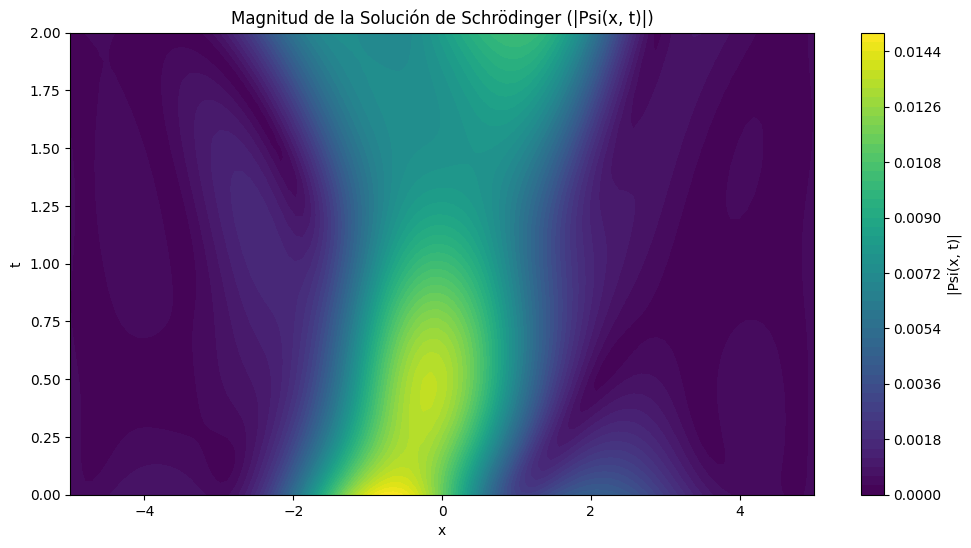

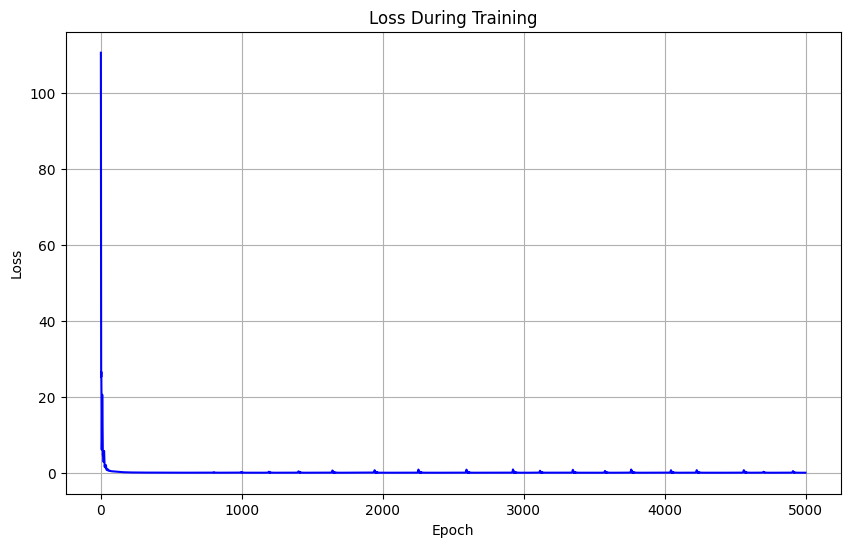

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Definir la red neuronal
class SchrodingerNN(nn.Module):
    def __init__(self):
        super(SchrodingerNN, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(2, 50),  # Entrada: (x, t), más neuronas para mayor capacidad
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 2)  # Salida: Parte real e imaginaria
        )

    def forward(self, x):
        return self.hidden(x)

# Paso 2: Definir el dominio del problema
x = torch.linspace(-5, 5, 100).view(-1, 1)  # Dominio espacial
t = torch.linspace(0, 2, 100).view(-1, 1)  # Dominio temporal
x, t = torch.meshgrid(x.squeeze(), t.squeeze())
inputs = torch.cat([x.reshape(-1, 1), t.reshape(-1, 1)], dim=1)  # Combinar (x, t)

# Paso 3: Potencial phi(x) = x^3
def potential_phi(x):
    return x**3

# Paso 4: Inicializar el modelo, optimizador y pérdida
model = SchrodingerNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Paso 5: Entrenamiento
losses = []
n_epochs = 5000

for epoch in range(n_epochs):
    optimizer.zero_grad()

    # Habilitar gradientes para calcular derivadas
    inputs.requires_grad_(True)

    # Predicción de la red
    output = model(inputs)  # Salida: [Re(psi), Im(psi)]
    psi_real, psi_imag = output[:, 0], output[:, 1]

    # Reconstruir psi como número complejo
    psi = psi_real + 1j * psi_imag

    # Derivadas parciales
    dpsi_dx = torch.autograd.grad(psi, inputs, grad_outputs=torch.ones_like(psi), create_graph=True)[0][:, 0]
    dpsi_dt = torch.autograd.grad(psi, inputs, grad_outputs=torch.ones_like(psi), create_graph=True)[0][:, 1]
    d2psi_dx2 = torch.autograd.grad(dpsi_dx, inputs, grad_outputs=torch.ones_like(dpsi_dx), create_graph=True)[0][:, 0]

    # Potencial
    phi = potential_phi(inputs[:, 0])

    # Ecuación de Schrödinger: i*dpsi/dt = -d2psi/dx2 + phi * psi
    schrodinger_eq = 1j * dpsi_dt + d2psi_dx2 - phi * psi

    # Pérdida como norma del residuo de la ecuación
    loss = criterion(torch.real(schrodinger_eq), torch.zeros_like(torch.real(schrodinger_eq))) + \
           criterion(torch.imag(schrodinger_eq), torch.zeros_like(torch.imag(schrodinger_eq)))

    # Retropropagación y optimización
    loss.backward()
    optimizer.step()

    # Guardar pérdida para graficar
    losses.append(loss.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Paso 6: Soluciones para graficar
with torch.no_grad():
    inputs.requires_grad_(False)
    output = model(inputs)
    psi_real, psi_imag = output[:, 0], output[:, 1]
    psi_abs = torch.sqrt(psi_real**2 + psi_imag**2).reshape(100, 100)  # Magnitud de psi

# Paso 7: Graficar la solución
plt.figure(figsize=(12, 6))
plt.contourf(x.numpy(), t.numpy(), psi_abs.numpy(), levels=50, cmap='viridis')
plt.colorbar(label="|Psi(x, t)|")
plt.xlabel("x")
plt.ylabel("t")
plt.title("Magnitud de la Solución de Schrödinger (|Psi(x, t)|)")
plt.show()

# Paso 8: Graficar la evolución de la pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), losses, color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss During Training")
plt.grid(True)
plt.show()

# Comentarios sobre el enfoque:
# - La red neuronal predice directamente las partes real e imaginaria de psi.
# - Usamos el método de autograd para calcular derivadas parciales necesarias.
# - La pérdida se basa en la norma del residuo de la ecuación de Schrödinger.
# - Se grafican tanto la magnitud de la solución como la evolución de la pérdida para evaluar el entrenamiento.


Epoch 0, Loss: 0.0039139483124017715
Epoch 500, Loss: 5.767220727648237e-07
Epoch 1000, Loss: 1.710637889118516e-07
Epoch 1500, Loss: 7.913168076356669e-08
Epoch 2000, Loss: 4.546540566252588e-08
Epoch 2500, Loss: 3.7822630361006304e-08
Epoch 3000, Loss: 2.24387157743422e-08
Epoch 3500, Loss: 1.725891607406993e-08
Epoch 4000, Loss: 3.9092887504921237e-07
Epoch 4500, Loss: 1.152255890701781e-08


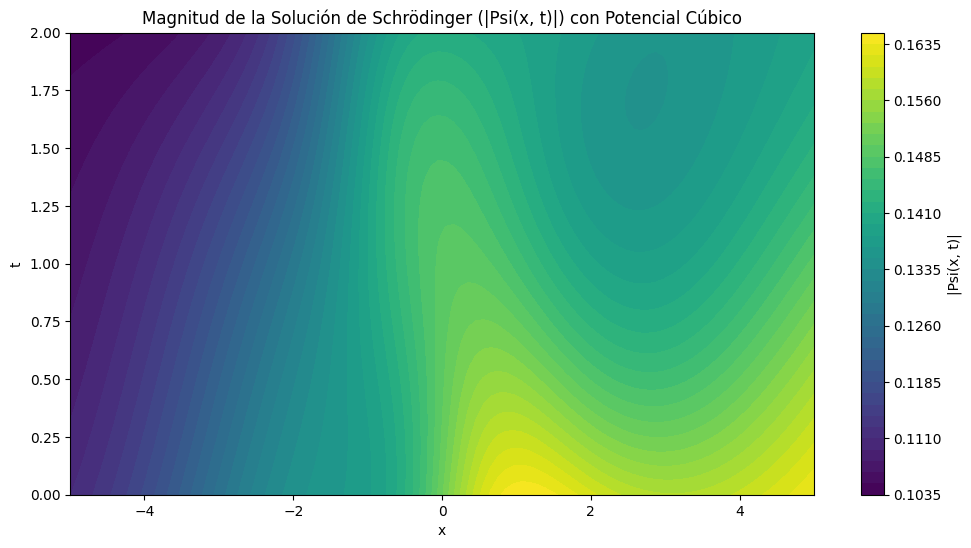

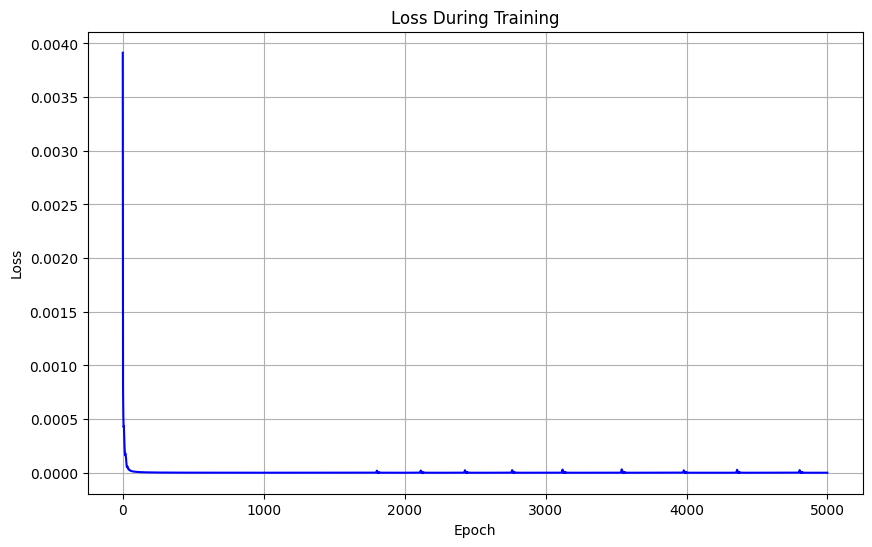

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Definir la red neuronal
class SchrodingerNN(nn.Module):
    def __init__(self):
        super(SchrodingerNN, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(2, 50),  # Entrada: (x, t), más neuronas para mayor capacidad
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 2)  # Salida: Parte real e imaginaria
        )

    def forward(self, x):
        return self.hidden(x)

# Paso 2: Definir el dominio del problema
x = torch.linspace(-5, 5, 100).view(-1, 1)  # Dominio espacial
t = torch.linspace(0, 2, 100).view(-1, 1)  # Dominio temporal
x, t = torch.meshgrid(x.squeeze(), t.squeeze())
inputs = torch.cat([x.reshape(-1, 1), t.reshape(-1, 1)], dim=1)  # Combinar (x, t)

# Paso 3: Inicializar el modelo, optimizador y pérdida
model = SchrodingerNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Paso 4: Entrenamiento
losses = []
n_epochs = 5000

for epoch in range(n_epochs):
    optimizer.zero_grad()

    # Habilitar gradientes para calcular derivadas
    inputs.requires_grad_(True)

    # Predicción de la red
    output = model(inputs)  # Salida: [Re(psi), Im(psi)]
    psi_real, psi_imag = output[:, 0], output[:, 1]

    # Reconstruir psi como número complejo
    psi = psi_real + 1j * psi_imag

    # Derivadas parciales
    dpsi_dx = torch.autograd.grad(psi, inputs, grad_outputs=torch.ones_like(psi), create_graph=True)[0][:, 0]
    dpsi_dt = torch.autograd.grad(psi, inputs, grad_outputs=torch.ones_like(psi), create_graph=True)[0][:, 1]
    d2psi_dx2 = torch.autograd.grad(dpsi_dx, inputs, grad_outputs=torch.ones_like(dpsi_dx), create_graph=True)[0][:, 0]

    # Potencial cúbico dependiente de Psi
    phi = torch.abs(psi)**3

    # Ecuación de Schrödinger: i*dpsi/dt = -d2psi/dx2 + phi * psi
    schrodinger_eq = 1j * dpsi_dt + d2psi_dx2 - phi * psi

    # Pérdida como norma del residuo de la ecuación
    loss = criterion(torch.real(schrodinger_eq), torch.zeros_like(torch.real(schrodinger_eq))) + \
           criterion(torch.imag(schrodinger_eq), torch.zeros_like(torch.imag(schrodinger_eq)))

    # Retropropagación y optimización
    loss.backward()
    optimizer.step()

    # Guardar pérdida para graficar
    losses.append(loss.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Paso 5: Soluciones para graficar
with torch.no_grad():
    inputs.requires_grad_(False)
    output = model(inputs)
    psi_real, psi_imag = output[:, 0], output[:, 1]
    psi_abs = torch.sqrt(psi_real**2 + psi_imag**2).reshape(100, 100)  # Magnitud de psi

# Paso 6: Graficar la solución
plt.figure(figsize=(12, 6))
plt.contourf(x.numpy(), t.numpy(), psi_abs.numpy(), levels=50, cmap='viridis')
plt.colorbar(label="|Psi(x, t)|")
plt.xlabel("x")
plt.ylabel("t")
plt.title("Magnitud de la Solución de Schrödinger (|Psi(x, t)|) con Potencial Cúbico")
plt.show()

# Paso 7: Graficar la evolución de la pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), losses, color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss During Training")
plt.grid(True)
plt.show()

# Comentarios sobre el enfoque:
# - La red neuronal predice directamente las partes real e imaginaria de psi.
# - El potencial ahora depende de |Psi|^3, introduciendo no linealidad.
# - Las derivadas necesarias se calculan con autograd para mantener precisión.
# - La pérdida se calcula como la norma del residuo de la ecuación de Schrödinger.
# - Se grafican la magnitud de Psi y la evolución de la pérdida para evaluar el modelo.
